<h1> Analyse non supervisée free pca

In [282]:
import sys 
sys.path.insert(1, "../Utilss")
from dbscan import DBSCAN
from k_means import K_means
from utils import silhouette_score_scratch

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import seaborn as sns
sns.set(style="white")

In [284]:
from utils import load_data
data = load_data('../Data/Dataset1_cleaned.csv')
data

N         P         K        pH         S        Zn        Fe   
0    0.281525  0.417582  0.593935  0.473214  0.370814  0.248175  0.007990  \
1    0.501466  0.336996  0.265533  0.616071  1.000000  0.335766  0.051938   
2    0.354839  0.490842  0.827663  0.589286  0.962989  0.335766  0.051938   
3    0.337243  0.285714  0.468195  0.633929  1.000000  0.394161  0.026368   
4    0.668622  0.512821  0.422337  0.625000  0.786747  0.262774  0.043947   
..        ...       ...       ...       ...       ...       ...       ...   
876  0.906158  0.571429  0.687130  0.919643  0.465280  0.423358  0.357970   
877  0.651026  0.446886  0.484467  0.276786  0.231230  0.408759  0.643228   
878  0.686217  0.461538  0.312870  0.616071  0.422982  0.510949  0.268478   
879  0.815249  0.798535  0.343935  0.401786  0.337681  0.744526  0.349181   
880  0.651026  0.542125  0.468195  0.500000  0.699330  0.554745  0.571314   

           Cu        Mn         B        OM  Fertility  
0    0.325359  0.446753  0.047170  0.468750          0  
1    0.693780  0.144416  1.000000  0.750000          0  
2    0.708134  0.134545  1.000000  0.789063          0  
3    0.688995  0.131948  1.000000  0.656250          0  
4    0.765550  0.120519  1.000000  0.593750          1  
..        ...       ...       ...       ...        ...  
876  0.287081  0.567273  0.594340  0.148438          1  
877  0.172249  0.408831  0.320755  0.000000          1  
878  0.258373  0.330909  0.245283  0.304688          1  
879  0.444976  0.682597  0.443396  0.757813          2  
880  0.851675  0.546494  0.537736  0.609375          0  

[881 rows x 12 columns]

In [285]:
df_final = data
df_final

N         P         K        pH         S        Zn        Fe   
0    0.281525  0.417582  0.593935  0.473214  0.370814  0.248175  0.007990  \
1    0.501466  0.336996  0.265533  0.616071  1.000000  0.335766  0.051938   
2    0.354839  0.490842  0.827663  0.589286  0.962989  0.335766  0.051938   
3    0.337243  0.285714  0.468195  0.633929  1.000000  0.394161  0.026368   
4    0.668622  0.512821  0.422337  0.625000  0.786747  0.262774  0.043947   
..        ...       ...       ...       ...       ...       ...       ...   
876  0.906158  0.571429  0.687130  0.919643  0.465280  0.423358  0.357970   
877  0.651026  0.446886  0.484467  0.276786  0.231230  0.408759  0.643228   
878  0.686217  0.461538  0.312870  0.616071  0.422982  0.510949  0.268478   
879  0.815249  0.798535  0.343935  0.401786  0.337681  0.744526  0.349181   
880  0.651026  0.542125  0.468195  0.500000  0.699330  0.554745  0.571314   

           Cu        Mn         B        OM  Fertility  
0    0.325359  0.446753  0.047170  0.468750          0  
1    0.693780  0.144416  1.000000  0.750000          0  
2    0.708134  0.134545  1.000000  0.789063          0  
3    0.688995  0.131948  1.000000  0.656250          0  
4    0.765550  0.120519  1.000000  0.593750          1  
..        ...       ...       ...       ...        ...  
876  0.287081  0.567273  0.594340  0.148438          1  
877  0.172249  0.408831  0.320755  0.000000          1  
878  0.258373  0.330909  0.245283  0.304688          1  
879  0.444976  0.682597  0.443396  0.757813          2  
880  0.851675  0.546494  0.537736  0.609375          0  

[881 rows x 12 columns]

C:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Temp\ipykernel_17524\2104972606.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:,8], cmap='viridis', edgecolors='k', alpha=0.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


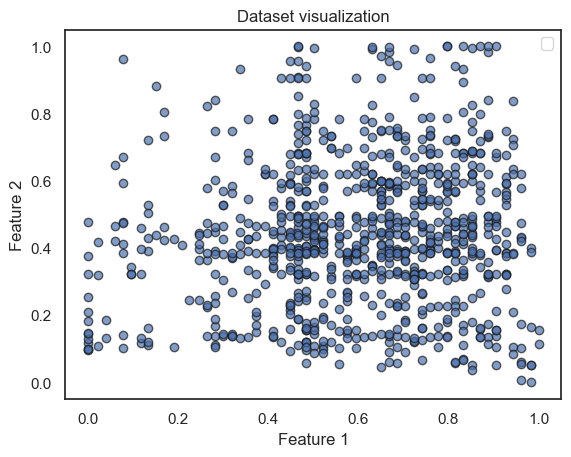

In [286]:
X = df_final.iloc[:, :-1].values
plt.scatter(X[:, 0], X[:,8], cmap='viridis', edgecolors='k', alpha=0.7)

plt.title('Dataset visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

<h2>A. Application d’algorithme de clustering basé partitionnement

<h2> K-means

Ici o a essayer avec k = 3 vu que notre target colomne contient 3 valeurs

In [324]:
model = K_means(k=3, data=X, distance='euclidean')
clusters, centroids = model.fit(100)
print(centroids)
print(clusters)


[[0.5442236  0.37278976 0.55649609 0.53003748 0.64823953 0.46120573
  0.06688764 0.36939571 0.19981401 0.90921267 0.46735147]
 [0.56869773 0.31599813 0.47402111 0.49204512 0.41683602 0.44085489
  0.35233276 0.41344242 0.49094864 0.27201258 0.35283243]
 [0.7090607  0.78400855 0.53622673 0.5491263  0.41397172 0.46950284
  0.38776473 0.43904142 0.51231704 0.32213135 0.3926368 ]]
[1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 2
 1 1 2 1 1 2 1 2 1 2 

In [288]:
data_after_clustering = df_final.copy()
data_after_clustering['cluster'] = clusters

In [289]:
from sklearn.decomposition import PCA

def visualize_pca(n_components, data, cluster_labels):
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['Cluster'] = cluster_labels
    return df_matrix

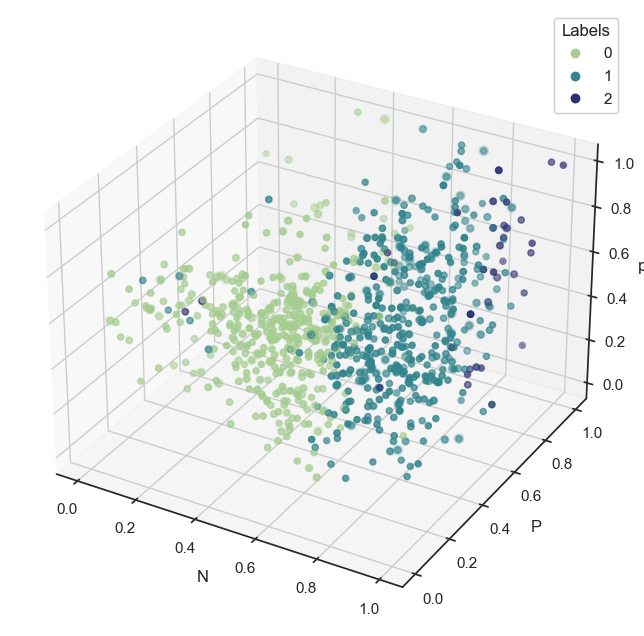

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df1 =data.copy()
df1.drop([ 'K','S', 'Zn', 'Fe', 'Mn', 'B','OM'], axis=1, inplace=True)

df1['Cluster'] = clusters

# Créer une figure en 3D avec une taille spécifiée
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser seaborn pour tracer le scatterplot en 3D avec la couleur basée sur la 4ème colonne
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], c=df1.iloc[:, 4], cmap='crest', marker='o')

# Ajouter une légende
legend = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend)

# Ajouter une dimension supplémentaire pour la taille des marqueurs basée sur la 4ème colonne
size_factor = 50  # Ajustez cela en fonction de la taille souhaitée des marqueurs
scatter_sizes = df1.iloc[:, 3] * size_factor
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], s=scatter_sizes, c=df1.iloc[:, 4], cmap='crest', marker='o', alpha=0.2)

# Ajouter le nom des attributs à chaque axe
ax.set_xlabel(df1.columns[0])
ax.set_ylabel(df1.columns[1])
ax.set_zlabel(df1.columns[2])

# Afficher le plot
plt.show()


<Axes: xlabel='x', ylabel='y'>

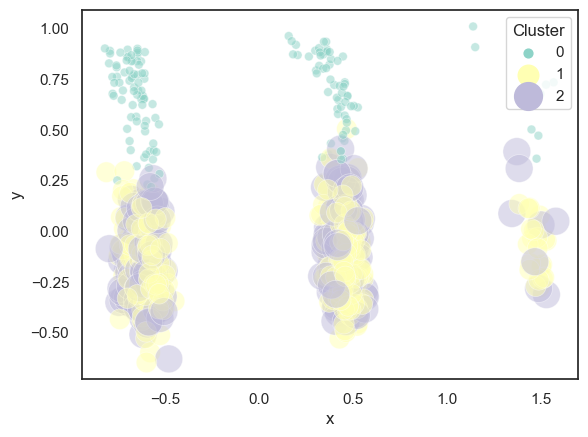

In [290]:
pca_df = visualize_pca(2, data, clusters)
np.unique(clusters)
sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.Cluster, size =pca_df.Cluster, sizes = (40,400),palette="Set3", legend = 'full', alpha = .5)


In [291]:
df_final

N         P         K        pH         S        Zn        Fe   
0    0.281525  0.417582  0.593935  0.473214  0.370814  0.248175  0.007990  \
1    0.501466  0.336996  0.265533  0.616071  1.000000  0.335766  0.051938   
2    0.354839  0.490842  0.827663  0.589286  0.962989  0.335766  0.051938   
3    0.337243  0.285714  0.468195  0.633929  1.000000  0.394161  0.026368   
4    0.668622  0.512821  0.422337  0.625000  0.786747  0.262774  0.043947   
..        ...       ...       ...       ...       ...       ...       ...   
876  0.906158  0.571429  0.687130  0.919643  0.465280  0.423358  0.357970   
877  0.651026  0.446886  0.484467  0.276786  0.231230  0.408759  0.643228   
878  0.686217  0.461538  0.312870  0.616071  0.422982  0.510949  0.268478   
879  0.815249  0.798535  0.343935  0.401786  0.337681  0.744526  0.349181   
880  0.651026  0.542125  0.468195  0.500000  0.699330  0.554745  0.571314   

           Cu        Mn         B        OM  Fertility  
0    0.325359  0.446753  0.047170  0.468750          0  
1    0.693780  0.144416  1.000000  0.750000          0  
2    0.708134  0.134545  1.000000  0.789063          0  
3    0.688995  0.131948  1.000000  0.656250          0  
4    0.765550  0.120519  1.000000  0.593750          1  
..        ...       ...       ...       ...        ...  
876  0.287081  0.567273  0.594340  0.148438          1  
877  0.172249  0.408831  0.320755  0.000000          1  
878  0.258373  0.330909  0.245283  0.304688          1  
879  0.444976  0.682597  0.443396  0.757813          2  
880  0.851675  0.546494  0.537736  0.609375          0  

[881 rows x 12 columns]

Evaluation avec silhouette score

In [292]:

silhouette_avg = silhouette_score_scratch(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.12805873152733935


<h3>Expérimentation en variant les paramètres de k-means sur les instances du dataset.

<h3>Elbow method

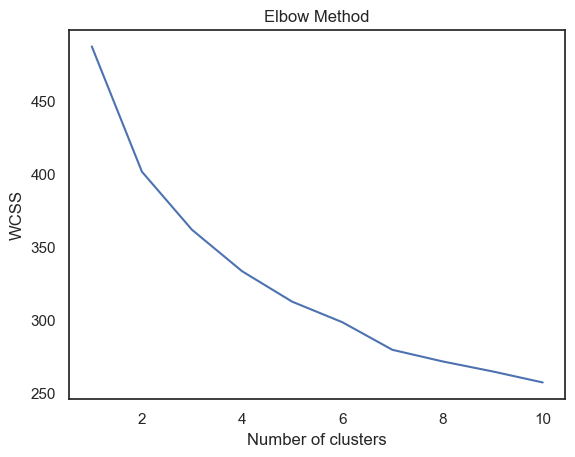

In [293]:
# elbow method
wcss = []

# Assuming X is your data
for i in range(1, 11):
    model = K_means(k=i, data=X, distance='euclidean')  # Fix the k value here
    clusters, centroids = model.fit(100)
    wcss_value = np.sum((X - centroids[clusters]) ** 2)  # Calculate WCSS
    wcss.append(wcss_value)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

On voit bien qu'avec 2 cluster on aura in bon resulatat donc on a tester avec

In [328]:
model = K_means(k=2, data=X, distance='euclidean')
clusters, centroids = model.fit(100)
print(centroids)
print(clusters)

[[0.54847386 0.37139389 0.55913221 0.53233305 0.64525199 0.45911977
  0.07023052 0.37037456 0.19773765 0.88952774 0.46565274]
 [0.61386289 0.4689262  0.49294117 0.50980638 0.41433277 0.45052489
  0.36594065 0.42202032 0.50129651 0.2868216  0.36513562]]
[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

<h3> Cluster centroids plot

<Axes: xlabel='x', ylabel='y'>

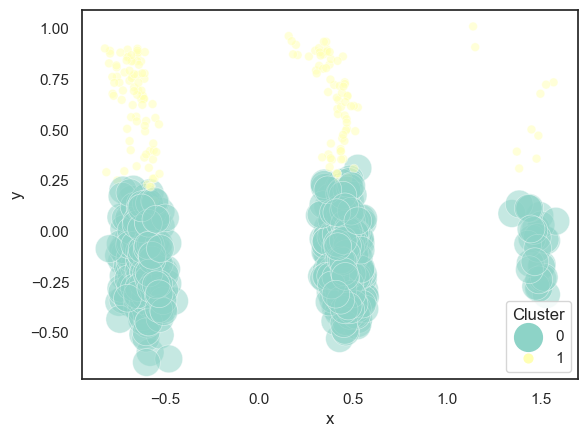

In [295]:

pca_df = visualize_pca(2, data, clusters)
np.unique(clusters)
sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.Cluster, size =pca_df.Cluster, sizes = (40,400),palette="Set3", legend = 'full', alpha = .5)

In [296]:

silhouette_avg = silhouette_score_scratch(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.23793597378977097


<h3>Silhouette Analysis

Silhouette Score for k=2: 0.23983029793556385
Number of cluster: 2
Number of unique points in each cluster: [(2, 717), (2, 164)]
Execution Time for k=2: 0.11609244346618652 seconds
Silhouette Score for k=3: 0.15471516753888342
Number of cluster: 3
Number of unique points in each cluster: [(3, 166), (3, 481), (3, 234)]
Execution Time for k=3: 0.3232877254486084 seconds
Silhouette Score for k=4: 0.1377325001217407
Number of cluster: 4
Number of unique points in each cluster: [(4, 247), (4, 197), (4, 291), (4, 146)]
Execution Time for k=4: 0.4169919490814209 seconds
Silhouette Score for k=5: 0.13912155723477185
Number of cluster: 5
Number of unique points in each cluster: [(5, 234), (5, 211), (5, 150), (5, 147), (5, 139)]
Execution Time for k=5: 0.6488335132598877 seconds
Silhouette Score for k=6: 0.1349544416597047
Number of cluster: 6
Number of unique points in each cluster: [(6, 146), (6, 136), (6, 103), (6, 178), (6, 171), (6, 147)]
Execution Time for k=6: 0.8275556564331055 seconds
S

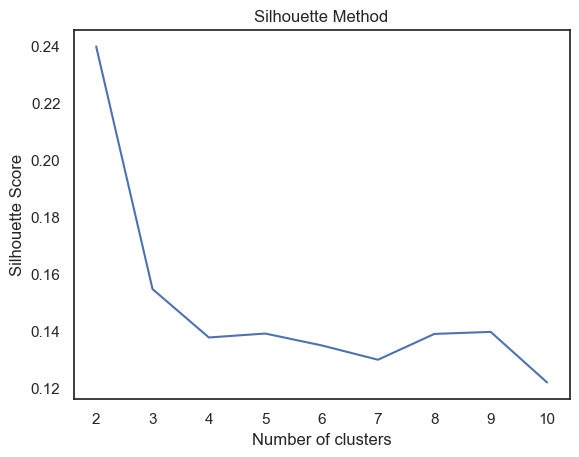

In [297]:
import time

# Initialize an empty list to store the results
result_data = []

# Plot the silhouette score for different k values
silhouette_scores = []

for i in range(2, 11):
    start_time = time.time()  # Record the start time
    model = K_means(k=i, data=X, distance='euclidean')
    clusters, centroids = model.fit(100)
    end_time = time.time()  # Record the end time

    silhouette_avg = silhouette_score_scratch(X, clusters)
    silhouette_scores.append(silhouette_avg)

    # Count the number of points in each cluster
    number_of_points_in_cluster = []
    unique_labels = np.unique(clusters)

    for j in unique_labels:
        number_of_points_in_cluster.append((i, np.sum(clusters == j)))

    # Append the results to the list
    result_data.append({
        'k': i,
        'Silhouette Score': silhouette_avg,
        'Len cluster': number_of_points_in_cluster,  # Count unique cluster assignments
        'Execution Time (s)': end_time - start_time  # Calculate the execution time
    })

    print(f"Silhouette Score for k={i}: {silhouette_avg}")
    print(f"Number of cluster: {len(set(clusters))}")
    print(f"Number of unique points in each cluster: {number_of_points_in_cluster}")
    print(f"Execution Time for k={i}: {end_time - start_time} seconds")

# Create a DataFrame from the list of results
result_df = pd.DataFrame(result_data)

# Plot the Silhouette Method
plt.plot(result_df['k'], result_df['Silhouette Score'])
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [298]:
result_df

k  Silhouette Score                                        Len cluster   
0   2          0.239830                               [(2, 717), (2, 164)]  \
1   3          0.154715                     [(3, 166), (3, 481), (3, 234)]   
2   4          0.137733           [(4, 247), (4, 197), (4, 291), (4, 146)]   
3   5          0.139122  [(5, 234), (5, 211), (5, 150), (5, 147), (5, 1...   
4   6          0.134954  [(6, 146), (6, 136), (6, 103), (6, 178), (6, 1...   
5   7          0.129931  [(7, 129), (7, 116), (7, 143), (7, 110), (7, 1...   
6   8          0.138984  [(8, 134), (8, 113), (8, 104), (8, 64), (8, 80...   
7   9          0.139699  [(9, 53), (9, 171), (9, 63), (9, 133), (9, 96)...   
8  10          0.121960  [(10, 75), (10, 140), (10, 154), (10, 58), (10...   

   Execution Time (s)  
0            0.116092  
1            0.323288  
2            0.416992  
3            0.648834  
4            0.827556  
5            1.036899  
6            0.964519  
7            0.900866  
8            1.328814

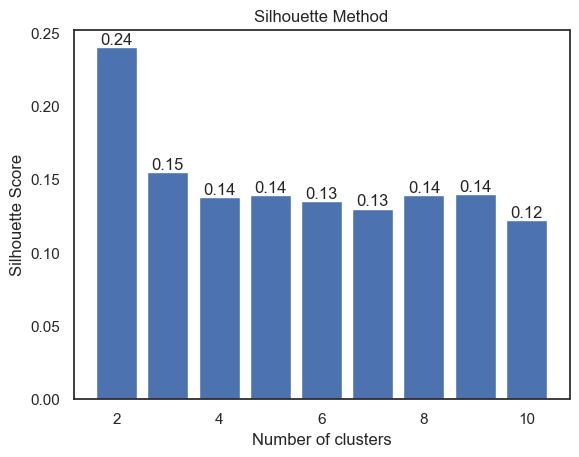

In [299]:
# bar chart of the silhouette scores for different k values
plt.bar(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

for i in range(2, 11):
    plt.text(i, silhouette_scores[i-2], f"{silhouette_scores[i-2]:.2f}", ha='center', va='bottom')
    
plt.show()

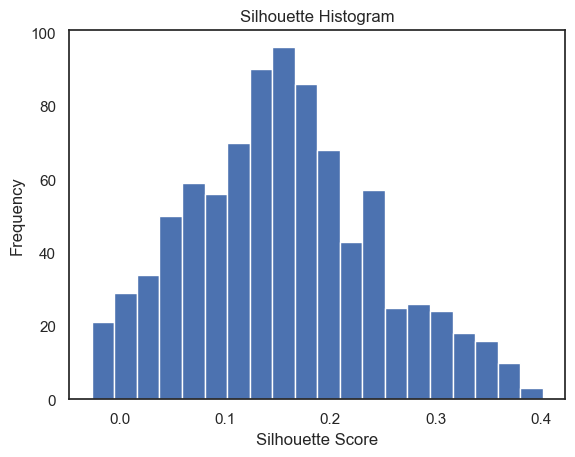

In [300]:
# cluster diagnostics
from utils import silhouette_sample_scratch
from matplotlib.ticker import FixedLocator, FixedFormatter

model = K_means(k=3, data=X, distance='euclidean')
clusters, centroids = model.fit(100)

silhouette_values = silhouette_sample_scratch(X, clusters)

plt.hist(silhouette_values, bins=20)
plt.title('Silhouette Histogram')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.show()

<h3>Pair plots

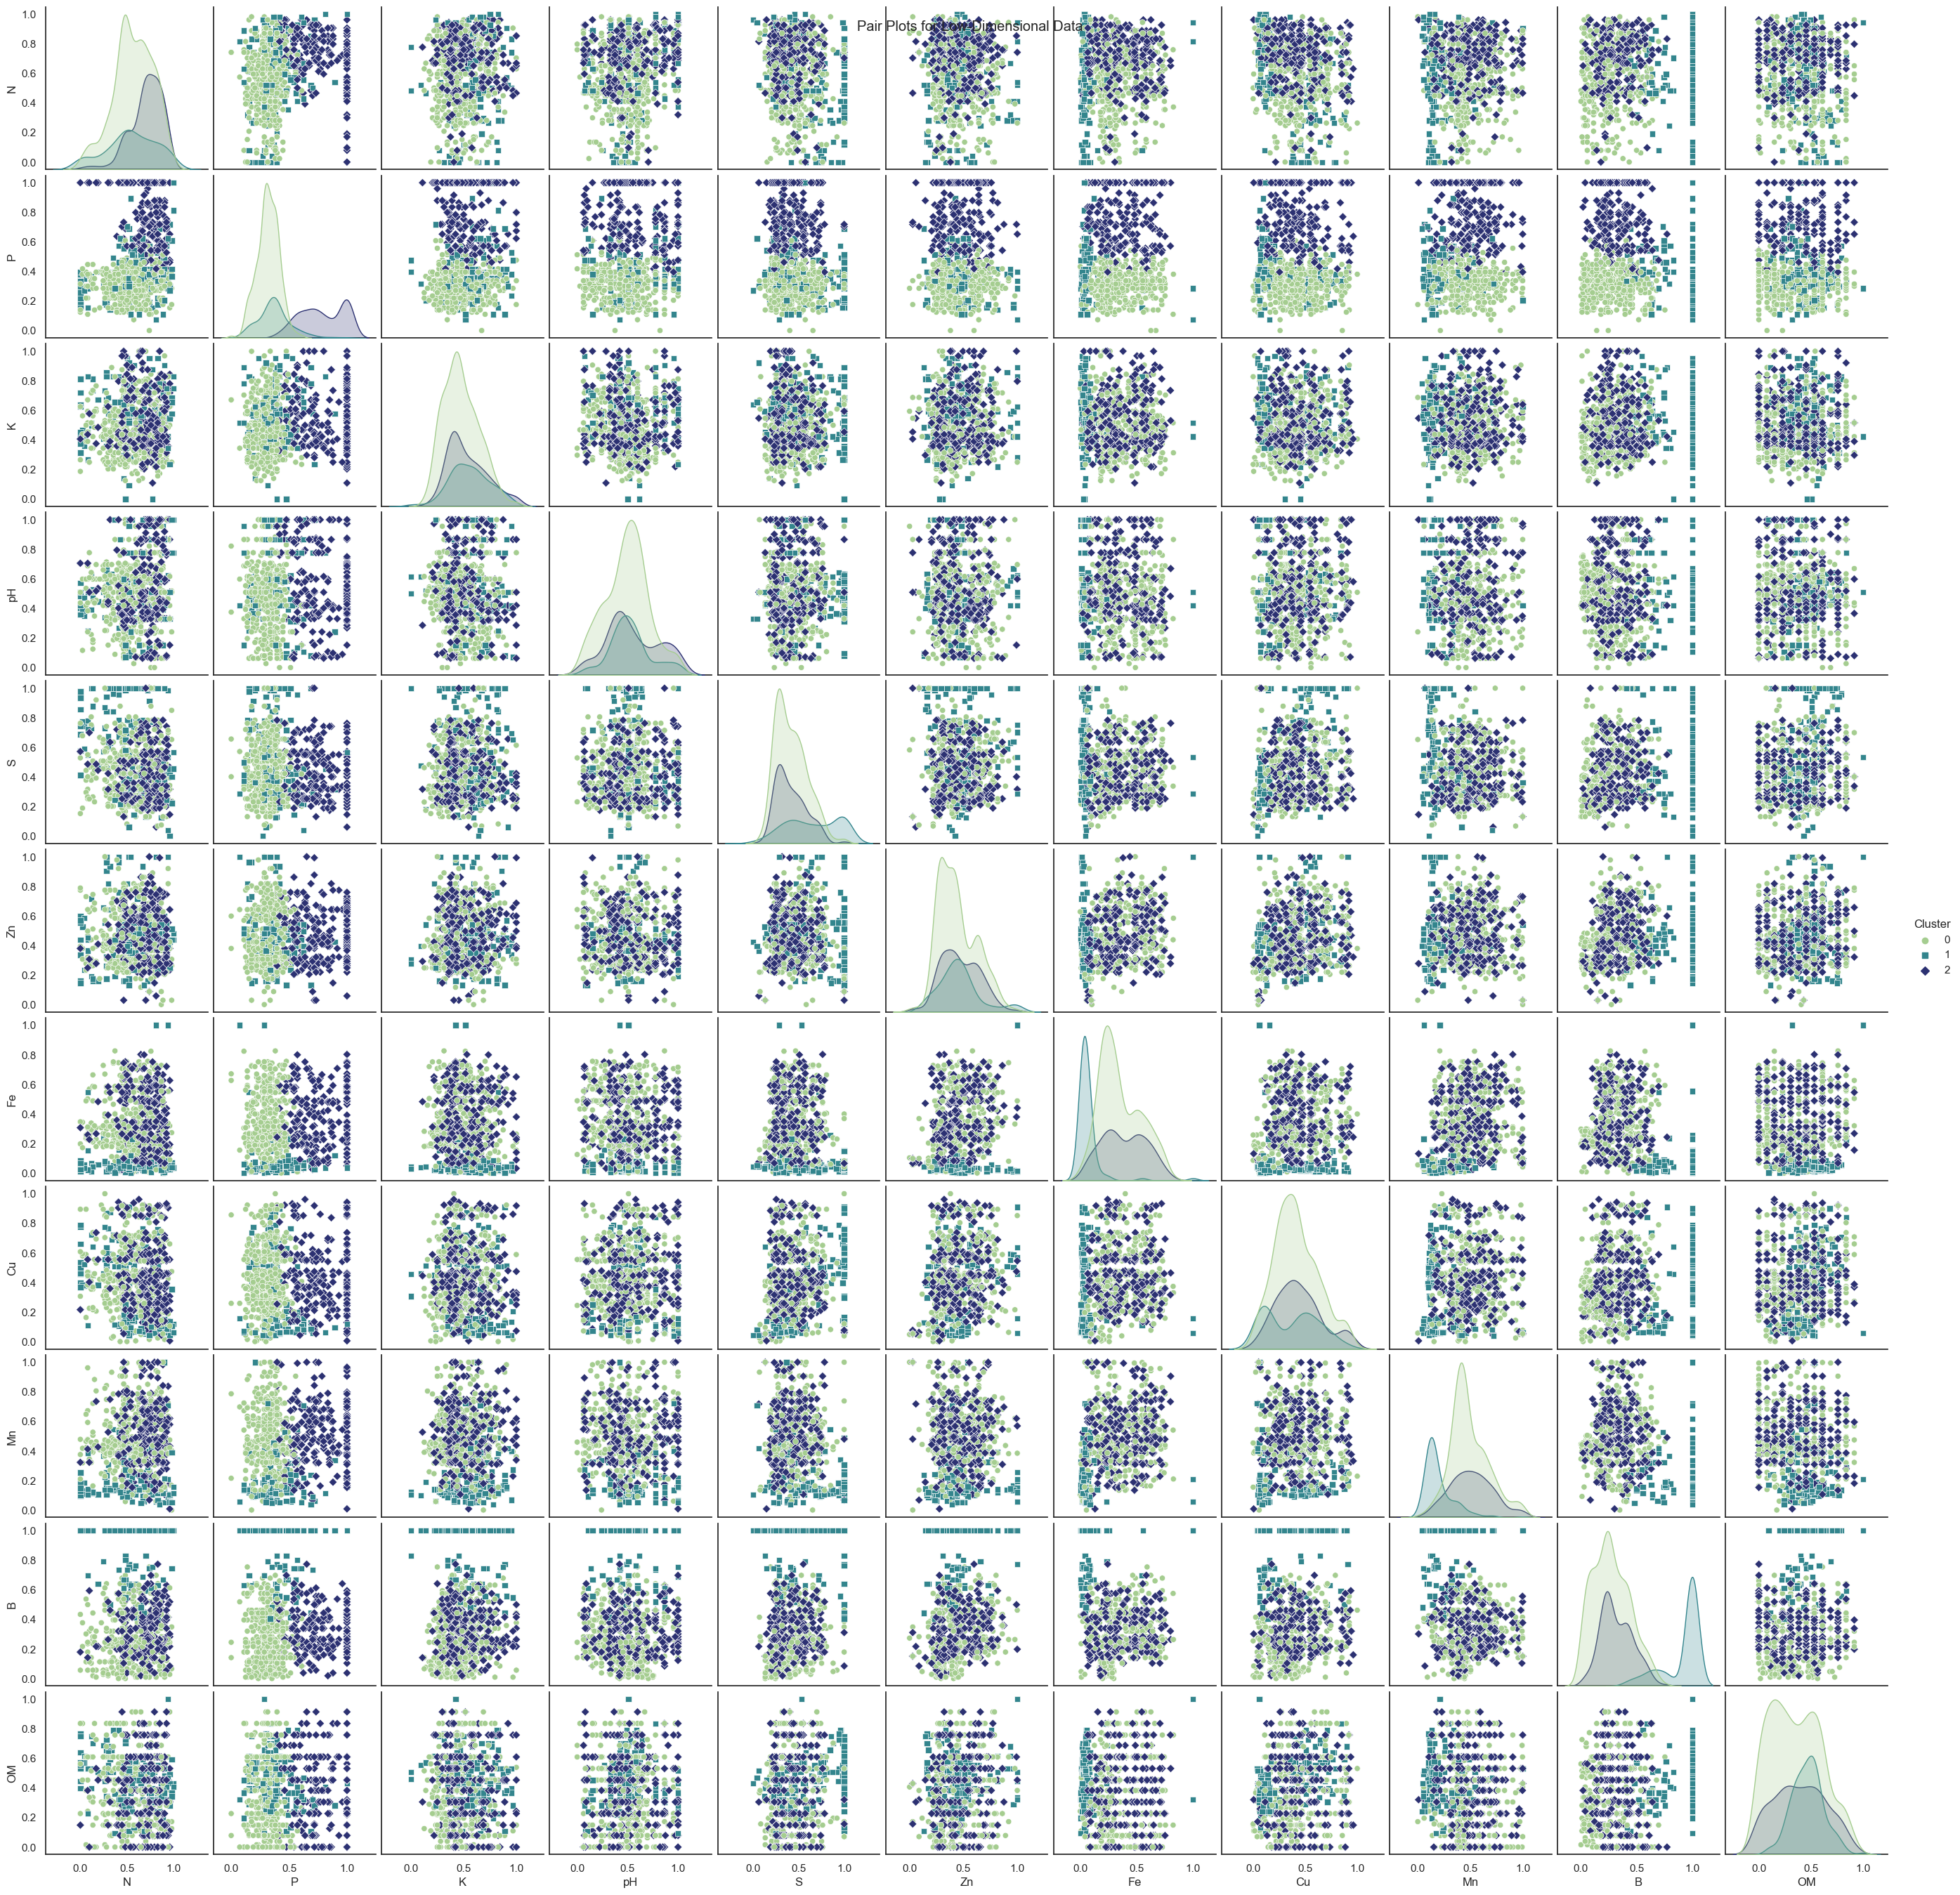

In [301]:
# Create pair plots
# drop the fertility column
df = df_final.copy()
df.drop('Fertility', axis=1, inplace=True)
df['Cluster']= clusters
sns.pairplot(df, hue='Cluster', palette='crest', markers=['o', 's', 'D'])
plt.suptitle('Pair Plots for Low-Dimensional Data')
plt.show()

In [302]:
df

N         P         K        pH         S        Zn        Fe   
0    0.281525  0.417582  0.593935  0.473214  0.370814  0.248175  0.007990  \
1    0.501466  0.336996  0.265533  0.616071  1.000000  0.335766  0.051938   
2    0.354839  0.490842  0.827663  0.589286  0.962989  0.335766  0.051938   
3    0.337243  0.285714  0.468195  0.633929  1.000000  0.394161  0.026368   
4    0.668622  0.512821  0.422337  0.625000  0.786747  0.262774  0.043947   
..        ...       ...       ...       ...       ...       ...       ...   
876  0.906158  0.571429  0.687130  0.919643  0.465280  0.423358  0.357970   
877  0.651026  0.446886  0.484467  0.276786  0.231230  0.408759  0.643228   
878  0.686217  0.461538  0.312870  0.616071  0.422982  0.510949  0.268478   
879  0.815249  0.798535  0.343935  0.401786  0.337681  0.744526  0.349181   
880  0.651026  0.542125  0.468195  0.500000  0.699330  0.554745  0.571314   

           Cu        Mn         B        OM  Cluster  
0    0.325359  0.446753  0.047170  0.468750        0  
1    0.693780  0.144416  1.000000  0.750000        1  
2    0.708134  0.134545  1.000000  0.789063        1  
3    0.688995  0.131948  1.000000  0.656250        1  
4    0.765550  0.120519  1.000000  0.593750        1  
..        ...       ...       ...       ...      ...  
876  0.287081  0.567273  0.594340  0.148438        2  
877  0.172249  0.408831  0.320755  0.000000        0  
878  0.258373  0.330909  0.245283  0.304688        0  
879  0.444976  0.682597  0.443396  0.757813        2  
880  0.851675  0.546494  0.537736  0.609375        2  

[881 rows x 12 columns]

<h3>Parallel Coordinates plot

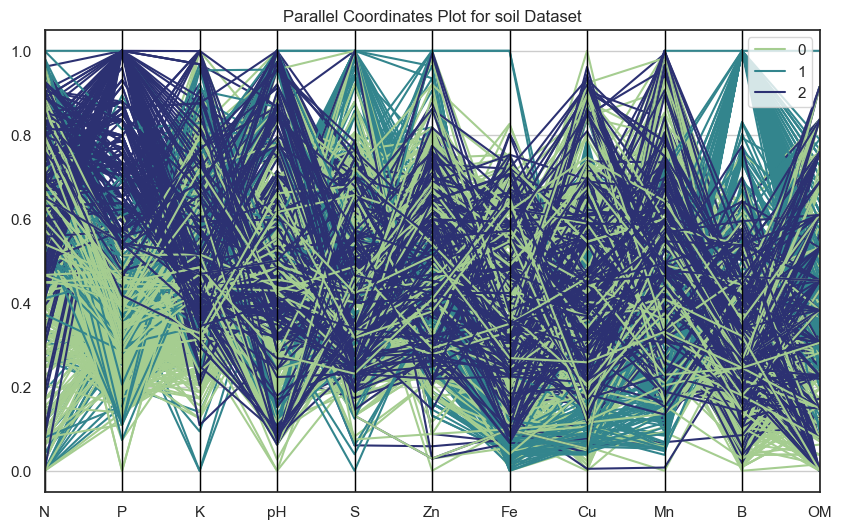

In [303]:
# Plotting Parallel Coordinates
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Cluster', colormap='crest')
plt.title('Parallel Coordinates Plot for soil Dataset')
plt.show()

<h2>Application d’algorithme de clustering basé densité

<h2>DBscan

<h3> Expérimentation des paramètres de DBSCAN sur les instances du dataset

In [304]:
import time

epss = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
min_pt = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
silhouette_avg = [[0 for i in range(len(min_pt))] for j in range(len(epss))]
result = []

for eps in epss:
    for pt in min_pt:
        start_time = time.time()  # Record the start time
        model = DBSCAN(eps=eps, min_samples=pt, distance='euclidean')
        labels, clusters, noise, core_samples, neighbors, neighborhood, neighborhoods, distance_matrix = model.fit(X)
        end_time = time.time()  # Record the end time

        # store the result
        silhouette_avg[epss.index(eps)][min_pt.index(pt)] = silhouette_score_scratch(X, labels)
        silhouette_avg_print = silhouette_score_scratch(X, labels)

        print(f"Silhouette Score: {silhouette_avg_print} eps: {eps} min_pt: {pt}")
        print(f"Nombre de cluster : {len(clusters)}")
        print(f"Nombre de points dans le bruit : {len(noise)}")
        # Count the number of points in each cluster
        number_of_points_in_cluster = []
        unique_labels = np.unique(labels)

        for i in unique_labels:
            number_of_points_in_cluster.append((i, np.sum(labels == i)))
        print(f"Nombre de points dans un cluster : {number_of_points_in_cluster}")
        print(f"Clusters: {clusters}")
        print(f"Execution Time for eps={eps}, min_pt={pt}: {end_time - start_time} seconds")

        result.append({
            'eps': eps,
            'min point': pt,
            'Silhouette Score': silhouette_avg_print,
            'Num cluster': centroids,
            'Len cluster': number_of_points_in_cluster,  # Count unique cluster assignments
            'Noise': noise,
            'Execution Time (s)': end_time - start_time  # Calculate the execution time
        })

result_df = pd.DataFrame(result)


Silhouette Score: -0.1656543580237664 eps: 0.2 min_pt: 4
Nombre de cluster : 1
Nombre de points dans le bruit : 880
Nombre de points dans un cluster : [(-1, 877), (1, 4)]
Clusters: [1]
Execution Time for eps=0.2, min_pt=4: 9.554589748382568 seconds
Silhouette Score: 0 eps: 0.2 min_pt: 5
Nombre de cluster : 0
Nombre de points dans le bruit : 881
Nombre de points dans un cluster : [(-1, 881)]
Clusters: []
Execution Time for eps=0.2, min_pt=5: 9.432422399520874 seconds
Silhouette Score: 0 eps: 0.2 min_pt: 6
Nombre de cluster : 0
Nombre de points dans le bruit : 881
Nombre de points dans un cluster : [(-1, 881)]
Clusters: []
Execution Time for eps=0.2, min_pt=6: 9.498639106750488 seconds
Silhouette Score: 0 eps: 0.2 min_pt: 7
Nombre de cluster : 0
Nombre de points dans le bruit : 881
Nombre de points dans un cluster : [(-1, 881)]
Clusters: []
Execution Time for eps=0.2, min_pt=7: 9.328099966049194 seconds
Silhouette Score: 0 eps: 0.2 min_pt: 8
Nombre de cluster : 0
Nombre de points dans le

In [321]:
import time

epss = [ 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
min_pt = [4, 6, 8, 10, 12, 14, 16,  18, 20]
silhouette_avg = [[0 for i in range(len(min_pt))] for j in range(len(epss))]
result = []

for eps in epss:
    for pt in min_pt:
        start_time = time.time()  # Record the start time
        model = DBSCAN(eps=eps, min_samples=pt, distance='euclidean')
        labels, clusters, noise, core_samples, neighbors, neighborhood, neighborhoods, distance_matrix = model.fit(X)
        end_time = time.time()  # Record the end time

        # store the result
        silhouette_avg[epss.index(eps)][min_pt.index(pt)] = silhouette_score_scratch(X, labels)
        silhouette_avg_print = silhouette_score_scratch(X, labels)

        print(f"Silhouette Score: {silhouette_avg_print} eps: {eps} min_pt: {pt}")
        print(f"Nombre de cluster : {len(clusters)}")
        print(f"Nombre de points dans le bruit : {len(noise)}")
        # Count the number of points in each cluster
        number_of_points_in_cluster = []
        unique_labels = np.unique(labels)

        for i in unique_labels:
            number_of_points_in_cluster.append((i, np.sum(labels == i)))
        print(f"Nombre de points dans un cluster : {number_of_points_in_cluster}")
        print(f"Clusters: {clusters}")
        print(f"Execution Time for eps={eps}, min_pt={pt}: {end_time - start_time} seconds")

        result.append({
            'eps': eps,
            'min point': pt,
            'Silhouette Score': silhouette_avg_print,
            'Num cluster': len(clusters),
            'Len cluster': number_of_points_in_cluster,  # Count unique cluster assignments
            'Noise': len(noise),
            'Execution Time (s)': end_time - start_time  # Calculate the execution time
        })

result_dbscan = pd.DataFrame(result)


Silhouette Score: -0.21578821049482447 eps: 0.3 min_pt: 4
Nombre de cluster : 9
Nombre de points dans le bruit : 776
Nombre de points dans un cluster : [(-1, 765), (1, 4), (2, 12), (3, 5), (4, 4), (5, 4), (6, 73), (7, 3), (8, 4), (9, 7)]
Clusters: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Execution Time for eps=0.3, min_pt=4: 12.210474729537964 seconds
Silhouette Score: -0.10452575790408569 eps: 0.3 min_pt: 6
Nombre de cluster : 2
Nombre de points dans le bruit : 804
Nombre de points dans un cluster : [(-1, 802), (1, 11), (2, 68)]
Clusters: [1, 2]
Execution Time for eps=0.3, min_pt=6: 10.685896873474121 seconds
Silhouette Score: -0.11819567643775523 eps: 0.3 min_pt: 8
Nombre de cluster : 2
Nombre de points dans le bruit : 824
Nombre de points dans un cluster : [(-1, 816), (1, 9), (2, 56)]
Clusters: [1, 2]
Execution Time for eps=0.3, min_pt=8: 10.785599708557129 seconds
Silhouette Score: -0.14451616006279716 eps: 0.3 min_pt: 10
Nombre de cluster : 3
Nombre de points dans le bruit : 841
Nombre de poin

In [322]:
result_dbscan.to_csv('../Data/result_dbscan.csv', index=False)

In [330]:
X3 = data.iloc[:, :-1].values
model = DBSCAN(eps=0.5, min_samples=19, distance='euclidean')
labels, clusters, noise, core_samples, neighbors, neighborhood, neighborhoods, distance_matrix = model.fit(X3)
print(labels)
print(clusters)
print(len(noise))
print(f'the core samples are {core_samples}')

# Count the number of points in each cluster
number_of_points_in_cluster = []
unique_labels = np.unique(labels)

for i in unique_labels:
    number_of_points_in_cluster.append((i, np.sum(labels == i)))

print(f"Nombre de points dans un cluster : {number_of_points_in_cluster}")
print(f'neighborhoods are {neighborhoods}')


[1, 2, 2, 2, 2, 2, -1, 2, -1, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, -1, -1, 2, 2, 2, 2, 2, -1, -1, 2, 2, -1, 2, -1, -1, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 2, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1

<Axes: xlabel='x', ylabel='y'>

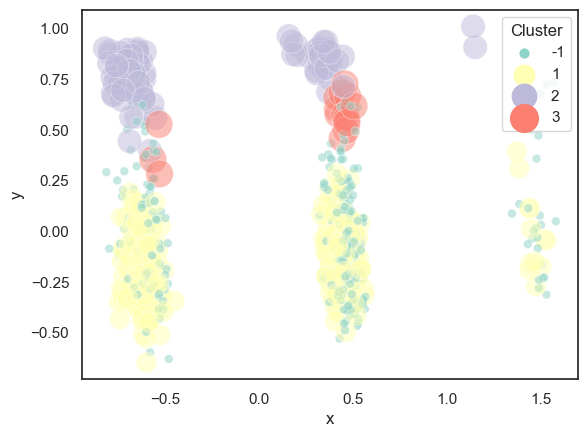

In [331]:

pca_df = visualize_pca(3, data, labels)
sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.Cluster, size =pca_df.Cluster, sizes = (40,400),palette="Set3", legend = 'full', alpha = .5)

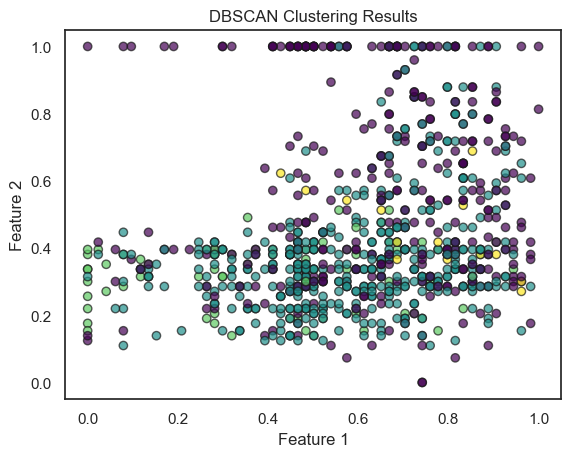

In [333]:
#plotting the clusters
X1 = pca_df.iloc[:, :-1].values
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [308]:
print("Label Distribution:", np.unique(labels, return_counts=True))

Label Distribution: (array([-1,  1,  2,  3]), array([329, 453,  84,  15], dtype=int64))


In [309]:
silhouette = silhouette_score_scratch(X, labels)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.08356808227280599


In [310]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
true_labels = df_final['Fertility'].values
# Evaluate Adjusted Rand Index
ari = adjusted_rand_score(true_labels, labels)
print(f"Adjusted Rand Index: {ari}")

# Evaluate Normalized Mutual Information
nmi = normalized_mutual_info_score(true_labels, labels)
print(f"Normalized Mutual Information: {nmi}")

Adjusted Rand Index: 0.023557592227252153
Normalized Mutual Information: 0.030603466126317622


<h3>Pair plots

c:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which 

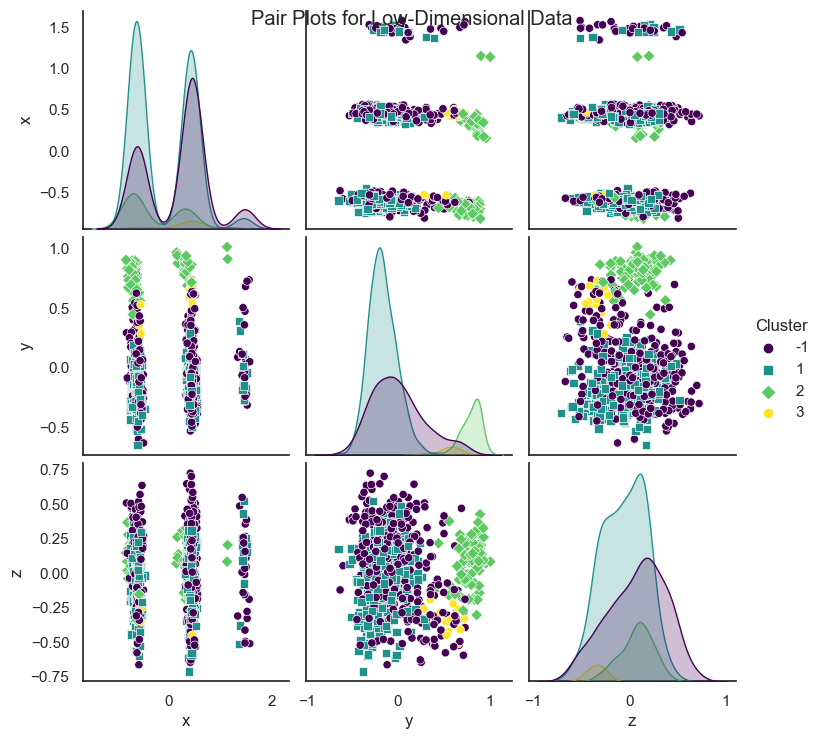

In [311]:
# Create pair plots
df['Cluster']= labels
sns.pairplot(pca_df, hue='Cluster', palette='viridis', markers=['o', 's', 'D'])
plt.suptitle('Pair Plots for Low-Dimensional Data')
plt.show()

<h3>Parallel Coordinates plot

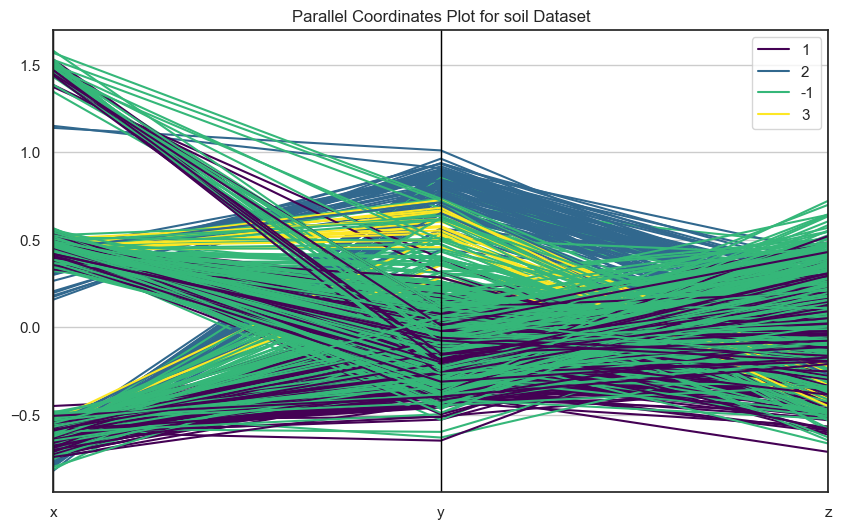

In [312]:
# Plotting Parallel Coordinates
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(pca_df, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot for soil Dataset')
plt.show()

<h3> plot Experimentation

In [313]:
silhouette_avg


[[-0.1656543580237664, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-0.21578821049482447,
  -0.11949371034950325,
  -0.10452575790408569,
  -0.10871400097344021,
  -0.11819567643775523,
  -0.16820640550013571,
  -0.14451616006279716,
  -0.14397244831934192,
  -0.1541072503517424,
  -0.1541072503517424,
  -0.15957183643878434,
  0,
  0,
  0,
  0,
  0,
  0],
 [-0.143047204121126,
  -0.11769390337777637,
  -0.10091489530047872,
  0.013593384598673095,
  -0.062382109207363756,
  -0.06608211445187327,
  -0.014385944437241852,
  -0.024963975595798615,
  -0.02479637686958872,
  -0.03326253344785985,
  -0.04778099469955487,
  -0.04778099469955487,
  -0.007835002162275699,
  -0.008589972346438273,
  -0.008589972346438273,
  -0.008589972346438273,
  -0.013926142958590217],
 [0.09484747513668192,
  0.09551311629325458,
  0.09291940813534139,
  0.09216840778826564,
  0.08478100178784097,
  0.08596770526008403,
  0.08134475192778029,
  0.08117274790498356,
  0.07972197401618891,
  0.076192586

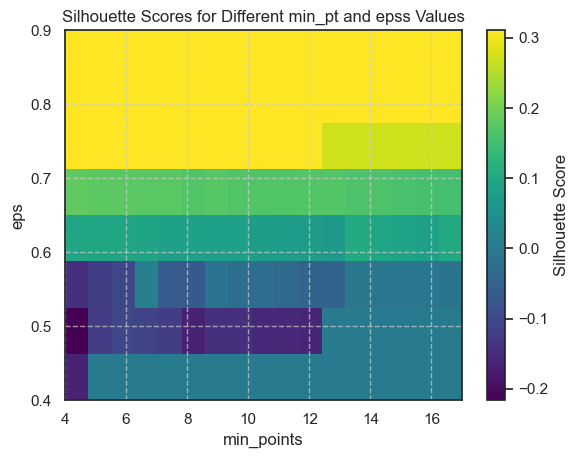

In [314]:
# plot a graphe of the different eps and min_pt values and their silhouette scores
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a meshgrid of epss and min_pt
epss = [0.4,0.5,0.6,0.7,0.8,0.9]
min_pt = [4,5,6,7,8,9,10,11,12,13,14,15,16,17]

# Convert silhouette_avg to a numpy array for easier manipulation
silhouette_avg_array = np.array(silhouette_avg)

# Create a heatmap
plt.imshow(silhouette_avg_array, cmap='viridis', extent=[min_pt[0], min_pt[-1], epss[0], epss[-1]], origin='lower', aspect='auto')

# Add colorbar
plt.colorbar(label='Silhouette Score')

# Set axis labels
plt.xlabel('min_points')
plt.ylabel('eps')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.title('Silhouette Scores for Different min_pt and epss Values')
plt.show()




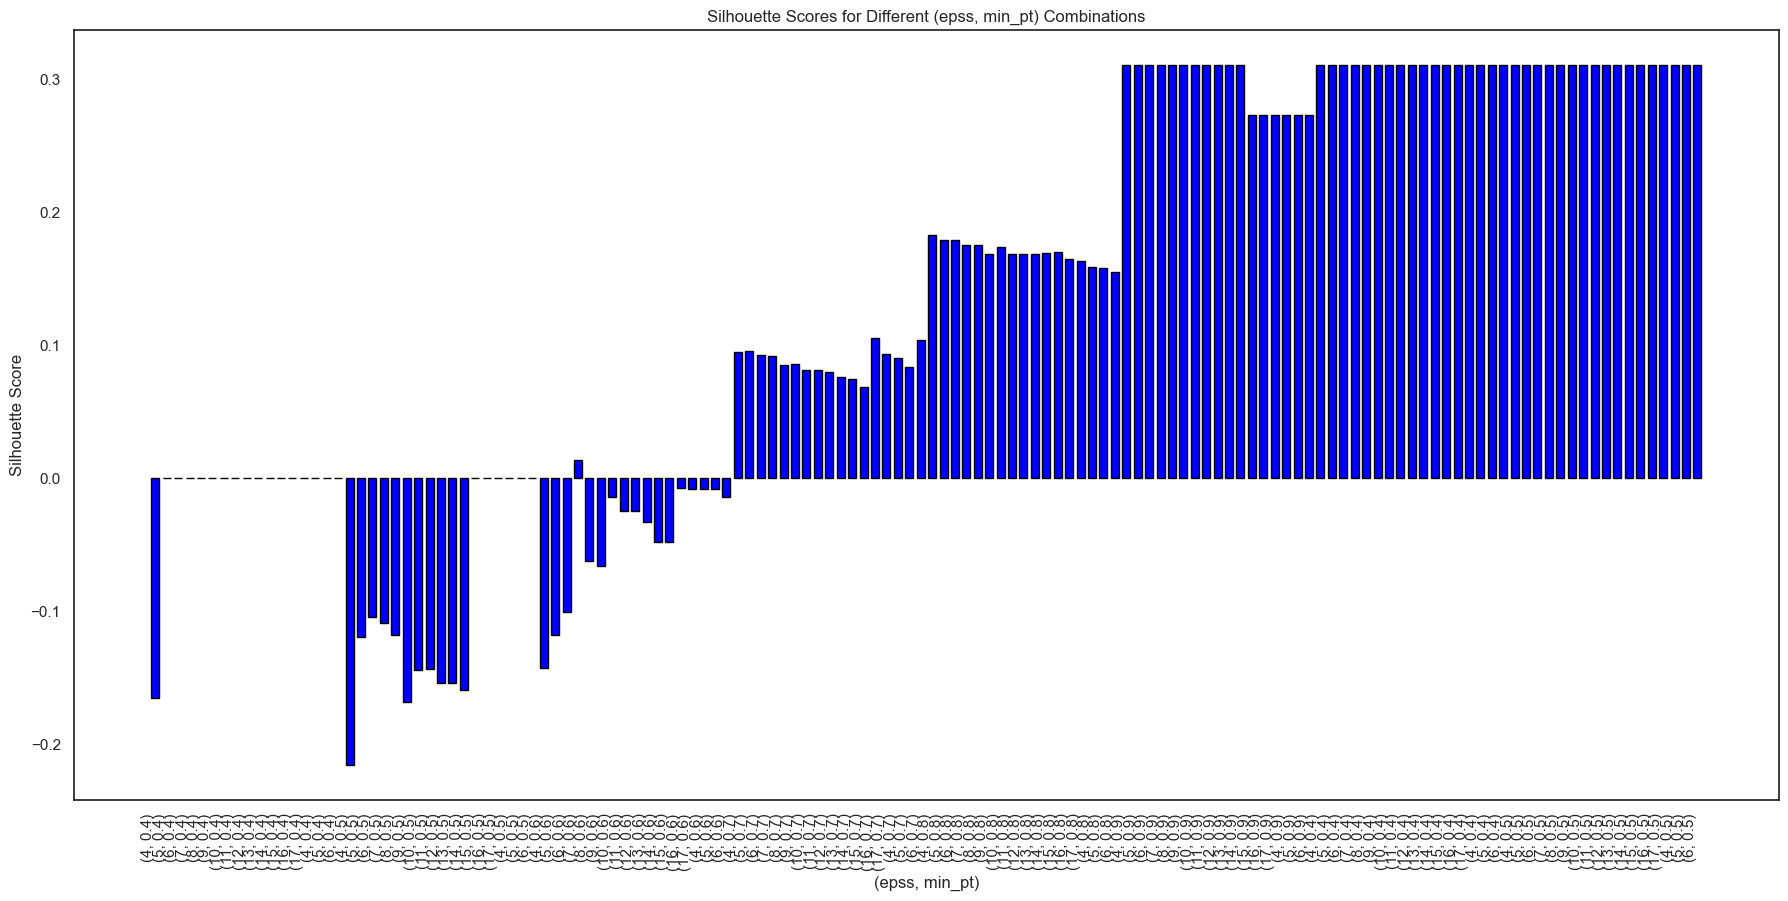

In [315]:

# make a bar chart of the silhouette scores for different eps and min_pt values
epss = [0.4,0.5,0.6,0.7,0.8,0.9]
min_pt = [4,5,6,7,8,9,10,11,12,13,14,15,16,17]
silhouette_avg_array = []
i = 0.4
j = 4
for i in range(len(epss)):
    for j in range(len(min_pt)):
        silhouette_avg_array.append(silhouette_avg[i][j])
        
        
epss = [0.4,0.5,0.6,0.7,0.8,0.9 , 0.4,0.5,0.6,0.7,0.8,0.9 , 0.4,0.5,0.6,0.7,0.8,0.9 , 0.4,0.5,0.6,0.7,0.8,0.9 , 0.4,0.5,0.6,0.7,0.8,0.9 , 0.4,0.5,0.6,0.7,0.8,0.9 , 0.4,0.5,0.6,0.7,0.8,0.9 ,
        0.4,0.5,0.6,0.7,0.8,0.9, 0.4,0.5,0.6,0.7,0.8,0.9, 0.4,0.5,0.6,0.7,0.8,0.9, 0.4,0.5,0.6,0.7,0.8,0.9, 0.4,0.5,0.6,0.7,0.8,0.9, 0.4,0.5,0.6,0.7,0.8,0.9, 0.4,0.5,0.6,0.7,0.8,0.9,
        0.4,0.5,0.6,0.7,0.8,0.9]
min_pt = [4,5,6,7,8,9,10,11,12,13,14,15,16,17 , 4,5,6,7,8,9,10,11,12,13,14,15,16,17 , 4,5,6,7,8,9,10,11,12,13,14,15,16,17 , 4,5,6,7,8,9,10,11,12,13,14,15,16,17 , 4,5,6,7,8,9,10,11,12,13,14,15,16,17
          , 4,5,6,7,8,9,10,11,12,13,14,15,16,17, 4,5,6,7,8,9,10,11,12,13,14,15,16,17]
        
    


silhouette_avg_array = np.array(silhouette_avg)

# Reshape silhouette_avg_array for plotting
num_rows, num_cols = silhouette_avg_array.shape
silhouette_avg_array_reshaped = silhouette_avg_array.reshape(num_rows * num_cols)

# Create a bar chart
fig, ax = plt.subplots(figsize=(22, 10))
bar_width = 0.7
bar_positions = np.arange(len(silhouette_avg_array_reshaped))
ax.bar(bar_positions, silhouette_avg_array_reshaped, width=bar_width, color='blue', edgecolor='black')

# Customize the plot
ax.set_xticks(bar_positions)
ax.set_xticklabels([f'{min_pt[j]  , epss[i]}'for i in range(num_rows) for j in range(num_cols)], rotation=90, ha='right')
ax.set_xlabel('(epss, min_pt)')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores for Different (epss, min_pt) Combinations')

plt.show()

<h1>Done